In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2019-01-03"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2019_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-01-03,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,해운대구,8472,해운대구,1797,26.92%,"7,774"
1,2019-01-03,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2019-01-03,고등어,30㎝정도 500g 1마리,3052,해운대구,3475,해운대구,423,13.86%,"3,240"
3,2019-01-03,달걀,오경슈퍼란60g정도 10개,2250,해운대구,2690,해운대구,440,19.56%,"2,507"
4,2019-01-03,닭고기,육계 1.0㎏,6380,해운대구,8487,해운대구,2107,33.03%,"7,082"
5,2019-01-03,대파,1.0㎏,3365,해운대구,4344,해운대구,979,29.09%,"3,941"
6,2019-01-03,돼지고기,삼겹살 500g,7900,해운대구,12250,해운대구,4350,55.06%,"9,467"
7,2019-01-03,두부,500g 판두부(국산포장두부 420g) 1모,4188,해운대구,4632,해운대구,444,10.6%,"4,395"
8,2019-01-03,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
9,2019-01-03,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2019-04-04"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2019_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-04-04,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,8175,해운대구,750,10.1%,"7,754"
1,2019-04-04,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2019-04-04,달걀,오경슈퍼란60g정도 10개,2380,해운대구,2690,해운대구,310,13.03%,"2,540"
3,2019-04-04,닭고기,육계 1.0㎏,4095,해운대구,8112,해운대구,4017,98.1%,"6,062"
4,2019-04-04,대파,1.0㎏,936,해운대구,2300,해운대구,1364,145.73%,"1,797"
5,2019-04-04,돼지고기,삼겹살 500g,6400,해운대구,14250,해운대구,7850,122.66%,"9,683"
6,2019-04-04,두부,500g 판두부(국산포장두부 420g) 1모,3206,해운대구,4879,해운대구,1673,52.18%,"4,132"
7,2019-04-04,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
8,2019-04-04,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"
9,2019-04-04,무,2.0㎏ 1개,1114,해운대구,2150,해운대구,1036,93.0%,"1,744"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2019-07-04"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2019_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-07-04,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5962,해운대구,7425,해운대구,1463,24.54%,"6,937"
1,2019-07-04,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2019-07-04,달걀,오경슈퍼란60g정도 10개,2580,해운대구,2690,해운대구,110,4.26%,"2,623"
3,2019-07-04,닭고기,육계 1.0㎏,4952,해운대구,7487,해운대구,2535,51.19%,"5,996"
4,2019-07-04,대파,1.0㎏,2200,해운대구,3069,해운대구,869,39.5%,"2,668"
5,2019-07-04,돼지고기,삼겹살 500g,8900,해운대구,14450,해운대구,5550,62.36%,"10,917"
6,2019-07-04,두부,500g 판두부(국산포장두부 420g) 1모,4310,해운대구,4879,해운대구,569,13.2%,"4,573"
7,2019-07-04,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
8,2019-07-04,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"
9,2019-07-04,무,2.0㎏ 1개,1295,해운대구,2483,해운대구,1188,91.74%,"1,719"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2019-10-10"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2019_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2019-10-10,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,해운대구,8175,해운대구,750,10.1%,"7,800"
1,2019-10-10,간장,오복왕표 0.9ℓ 1병,6350,해운대구,7250,해운대구,900,14.17%,"6,800"
2,2019-10-10,갈치,60cm정도 500g 1마리(냉동),11216,해운대구,18670,해운대구,7454,66.46%,"14,943"
3,2019-10-10,고등어,30㎝정도 500g 1마리,3240,해운대구,3571,해운대구,331,10.22%,"3,406"
4,2019-10-10,달걀,오경슈퍼란60g정도 10개,2680,해운대구,2700,해운대구,20,0.75%,"2,690"
5,2019-10-10,닭고기,육계 1.0㎏,4714,해운대구,5700,해운대구,986,20.92%,"5,207"
6,2019-10-10,대파,1.0㎏,2758,해운대구,3425,해운대구,667,24.18%,"3,092"
7,2019-10-10,돼지고기,삼겹살 500g,8400,해운대구,9900,해운대구,1500,17.86%,"9,150"
8,2019-10-10,두부,500g 판두부(국산포장두부 420g) 1모,2828,해운대구,4879,해운대구,2051,72.52%,"3,854"
9,2019-10-10,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676


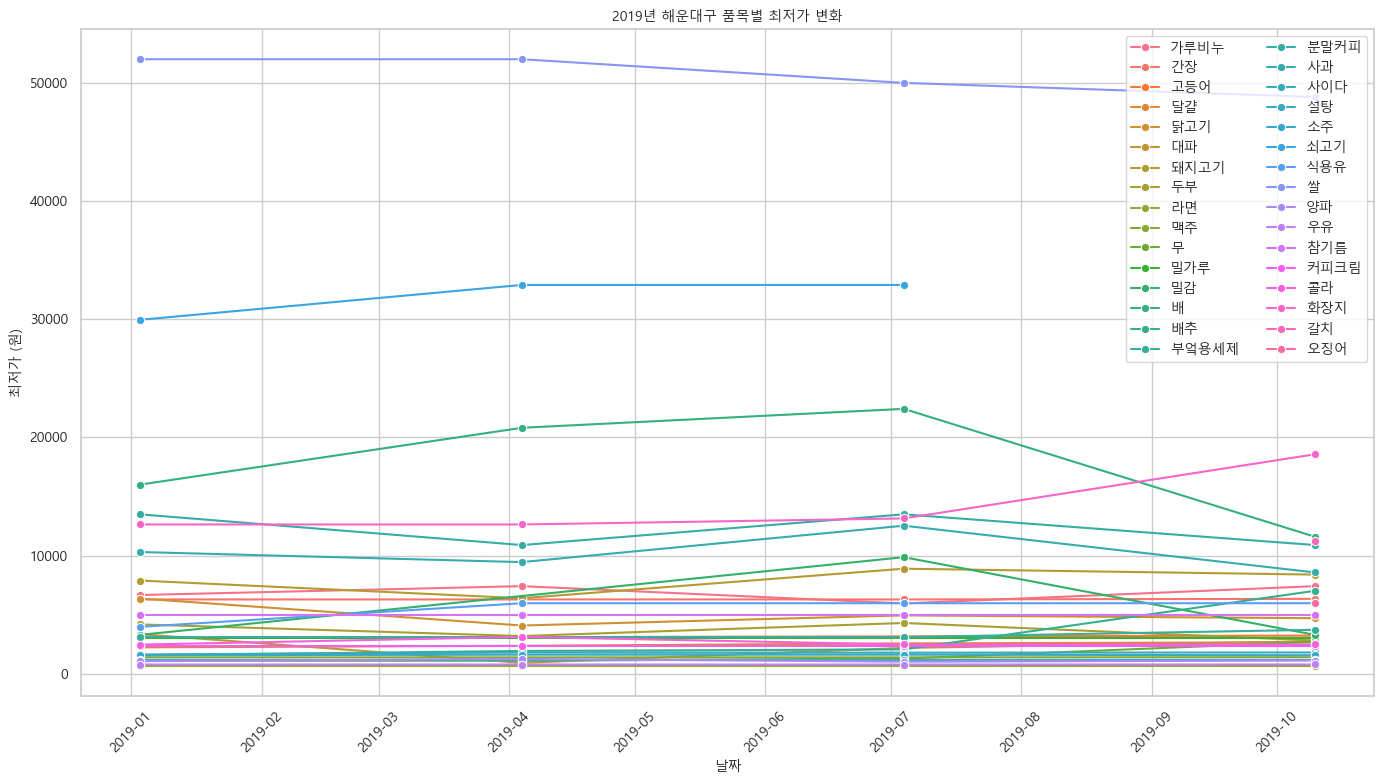

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2019_1q.csv")
q2 = pd.read_csv("해운대구2019_2q.csv")
q3 = pd.read_csv("해운대구2019_3q.csv")
q4 = pd.read_csv("해운대구2019_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2019년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2019_min.csv", index=False, encoding="utf-8-sig")

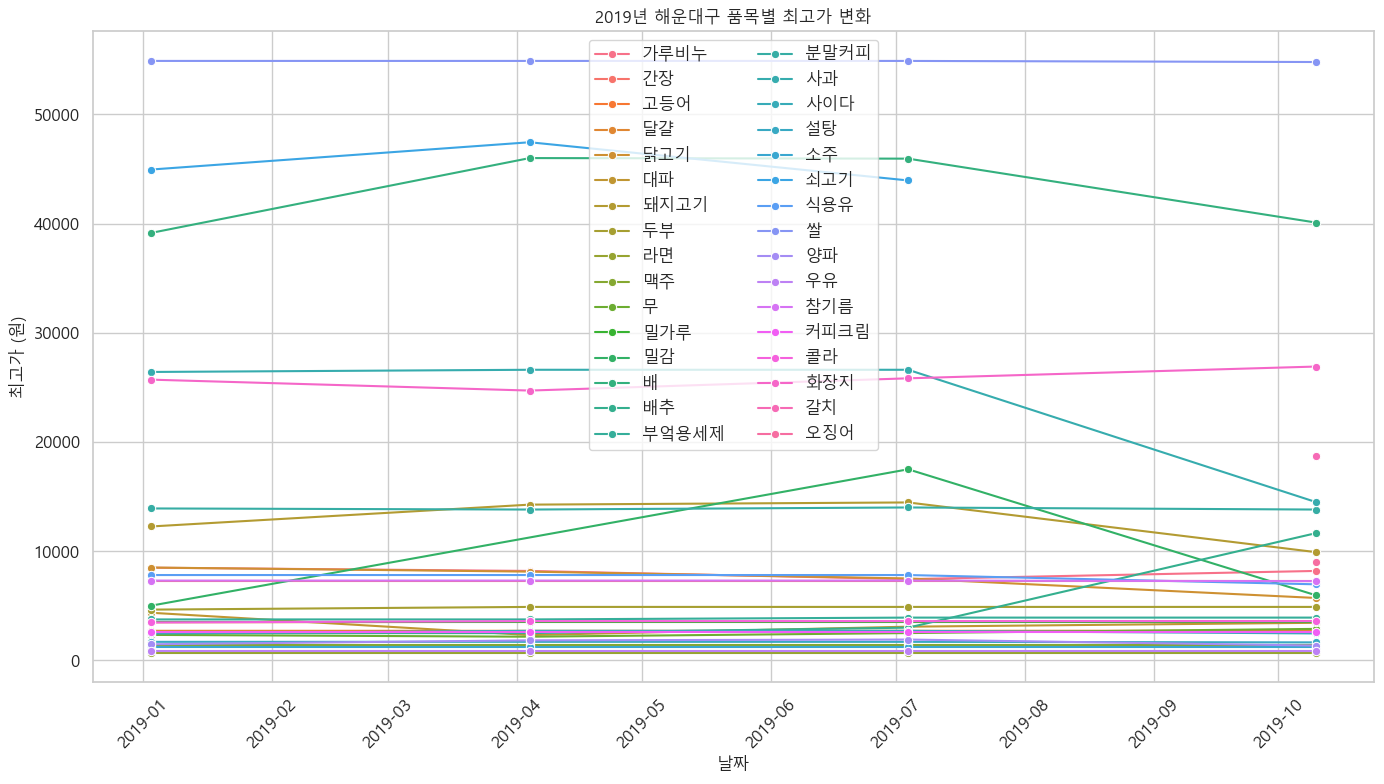

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2019_1q.csv")
q2 = pd.read_csv("해운대구2019_2q.csv")
q3 = pd.read_csv("해운대구2019_3q.csv")
q4 = pd.read_csv("해운대구2019_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2019년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2019_max.csv", index=False, encoding="utf-8-sig")